In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying plots inline
%matplotlib inline


In [2]:
df = pd.read_csv('/content/sierraleone-bumbuna.csv')  # Replace with your actual dataset path


In [3]:
print(df.isnull().sum())


Timestamp             0
GHI                   0
DNI                   1
DHI                   1
ModA                  1
ModB                  1
Tamb                  1
RH                    1
WS                    1
WSgust                1
WSstdev               1
WD                    1
WDstdev               1
BP                    1
Cleaning              1
Precipitation         1
TModA                 1
TModB                 1
Comments         131597
dtype: int64


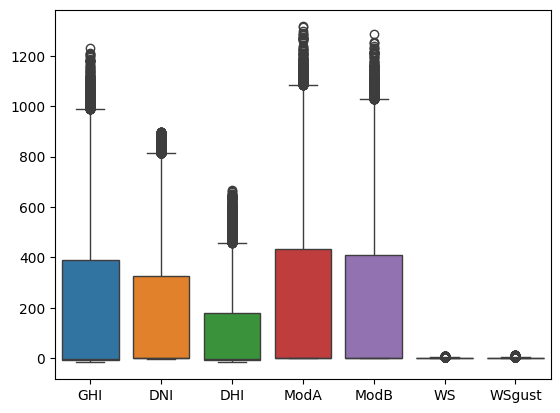

In [4]:
sns.boxplot(data=df[['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']])
plt.show()


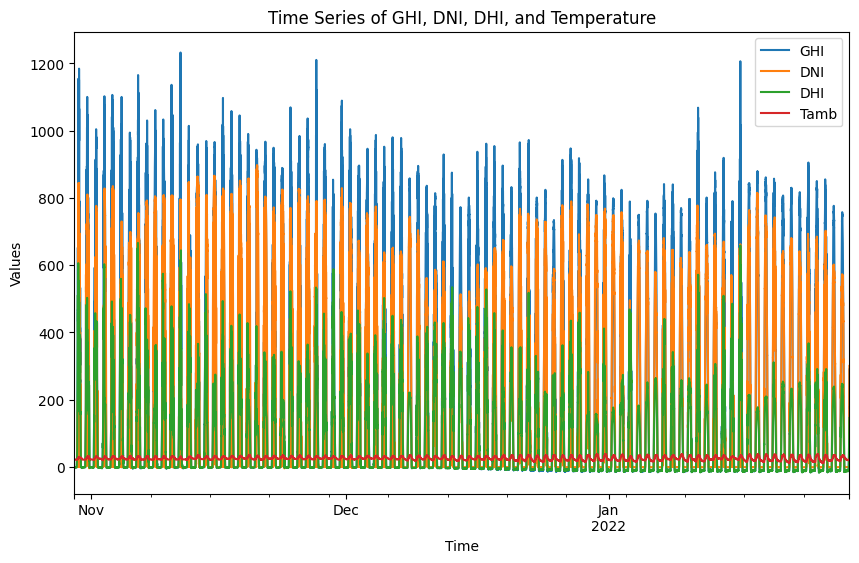

In [5]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True)

df[['GHI', 'DNI', 'DHI', 'Tamb']].plot(figsize=(10, 6))
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Time Series of GHI, DNI, DHI, and Temperature')
plt.show()


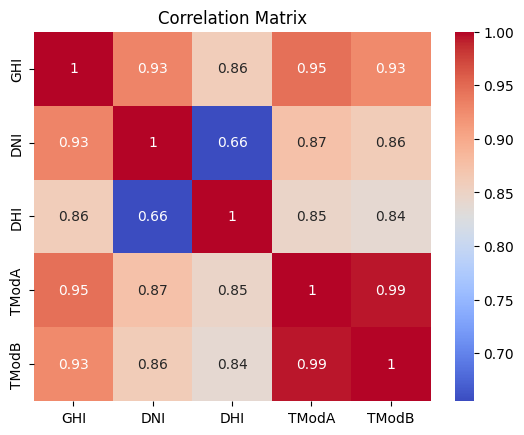

In [6]:
corr = df[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [7]:
from windrose import WindroseAxes

ax = WindroseAxes.from_ax()
ax.bar(df['WD'], df['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
plt.title('Wind Rose')
plt.show()


ModuleNotFoundError: No module named 'windrose'

In [8]:
!pip install windrose

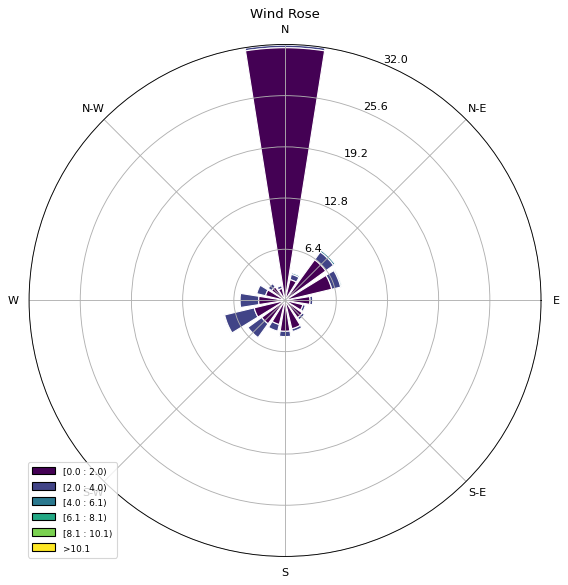

In [9]:
from windrose import WindroseAxes

ax = WindroseAxes.from_ax()
ax.bar(df['WD'], df['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
plt.title('Wind Rose')
plt.show()


In [10]:
from scipy.stats import zscore

df['GHI_zscore'] = zscore(df['GHI'])
outliers = df[df['GHI_zscore'].abs() > 3]
print(outliers)


                        GHI    DNI    DHI    ModA    ModB  Tamb    RH   WS  \
Timestamp                                                                    
2021-10-30 11:04:00  1119.0  673.5  538.4  1193.0  1167.0  26.3  83.1  0.1   
2021-10-30 11:12:00  1154.0  755.7  491.3  1237.0  1208.0  27.0  82.4  1.2   
2021-10-30 13:01:00  1111.0  812.0  361.4  1189.0  1162.0  29.5  73.0  0.7   
2021-10-30 13:02:00  1126.0  815.0  373.3  1202.0  1175.0  29.7  72.4  0.6   
2021-10-30 13:03:00  1151.0  813.0  400.1  1226.0  1198.0  30.0  72.2  2.1   
2021-10-30 13:04:00  1149.0  771.6  436.9  1219.0  1190.0  30.1  73.8  2.8   
2021-10-30 13:10:00  1107.0  697.0  465.3  1184.0  1158.0  29.6  73.4  2.7   
2021-10-30 13:11:00  1184.0  773.5  471.7  1259.0  1231.0  29.5  72.0  1.6   
2021-10-30 13:13:00  1103.0  678.7  476.9  1171.0  1145.0  29.7  74.7  0.0   
2021-10-31 12:20:00  1100.0  792.9  360.5  1185.0  1156.0  29.2  76.1  1.8   
2021-11-02 12:56:00  1102.0  815.0  352.8  1184.0  1161.0  29.0 